# Ev for Selection and Analysis of v-Ar 1mu-1p with enhanced CCQE 
July 9, 2017

In [1]:
import sys; sys.path.insert(0, '../../../AnaTreesPackage/notebooks'); sys.path.insert(0, '../');
from ccqe_notebook_tools import *
from tracking_tools import *
from notebooks_tools import * 
%matplotlib inline

In [2]:
pair_types = ['all'   ,'1mu-1p'   ,'other pairs','cosmic' ,'CC 1p 0pi'    ]
labels     = ['all'   ,'1$\\mu$1p','other pairs','cosmic' ,'CC 1p 0$\\pi$']
colors     = ['black' ,'green'    ,'red'        ,'Orange' ,'blue'         ]
cmaps      = ['Greys' , 'Greens'  ,'Reds'       ,'Oranges','Blues'        ]
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/'

# 2-tracks pairs

In [3]:
pairs = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_Topology_MCC8_MC_BNB_extBNB.csv')
pairsFV = sample_in_FV(pairs)
print len(pairs),'pairs from MC-BNB + cosmic DATA overlay'
print len(pairsFV),'pairs in FV'

42407 pairs from MC-BNB + cosmic DATA overlay
25825 pairs in FV


In [4]:
samples=dict()
for pair_type in pair_types:
    samples[pair_type] = pairsFV[pairsFV[pair_type]==True]
    Ntype = len(samples[pair_type])
    if pair_type=='CC 1p 0pi': print_line()
    print Ntype,'are '+pair_type+', %.1f'%(100.*float(Ntype)/len(pairsFV))+'%'

25825 are all, 100.0%
3243 are 1mu-1p, 12.6%
3206 are other pairs, 12.4%
19376 are cosmic, 75.0%
--------------------------------------------------------------
873 are CC 1p 0pi, 3.4%


In [5]:
def get_pur_eff_cut(cut_name = '${PID}_A$' , reduced = dict()):
    global pur_eff
    Noriginal , Nreducted , freducted = dict() , dict() , dict()
    for pair_type in pair_types:
        sam = samples[pair_type]
        Noriginal[pair_type] = len(samples[pair_type])
        Nreducted[pair_type] = float(len(reduced[pair_type]))
        freducted[pair_type] = 100.0 * Nreducted[pair_type]/Noriginal[pair_type]
    pur_eff_cut = pd.DataFrame({'$\mu p$ eff.':'%.1f'%freducted['1mu-1p']+'%'
                               ,'$\mu p$ pur.':'%.1f'%(100.*Nreducted['1mu-1p']/Nreducted['all'] if Nreducted['all']>0 else 0)+'%'
                               ,'CC$0\pi 1 p$ eff.':'%.1f'%freducted['CC 1p 0pi']+'%'
                               ,'CC$0\pi 1 p$ pur.':'%.1f'%(100.*Nreducted['CC 1p 0pi']/Nreducted['all'] if Nreducted['all']>0 else 0)+'%'}
                               , index=[cut_name]
                              )
    for pair_type in pair_types: pur_eff_cut[pair_type] = '%.1f'%freducted[pair_type]+'%' +' (%.0f)'%Nreducted[pair_type]
    pur_eff = pur_eff.append(pur_eff_cut)
    reduced_samples[cut_name] = reduced  

In [6]:
reduced_samples=dict(dict())
pur_eff = pd.DataFrame()
reduced = dict()
for pair_type in pair_types: reduced[pair_type] = samples[pair_type]
reduced_samples['no cut'] = reduced

# cut 1: PIDa
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['no cut'][pair_type]
    reduced[pair_type] = sam[sam['PIDA_assigned_muon']>6] # 8
get_pur_eff_cut(cut_name = '${PID}_A$', reduced = reduced)

# cut 2: lµ vs lp
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['${PID}_A$'][pair_type]
    reduced[pair_type] = sam[(sam['l_small_pida']>4)
                             &(sam['l_large_pida']>8)&(sam['l_large_pida']<120)]
get_pur_eff_cut(cut_name = '$l_{\\mu}-l_{p}$', reduced = reduced)

# cut 3: |\theta_{1,2}-90^0|<60^0$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$l_{\\mu}-l_{p}$'][pair_type]
    reduced[pair_type] = sam[np.abs(180./np.pi*sam['2_tracks_angle']-90)<60]
get_pur_eff_cut(cut_name = '$|\theta_{1,2}-90^0|<60^0$', reduced = reduced)

# cut 4: vertex $\Delta Q$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$|\theta_{1,2}-90^0|<60^0$'][pair_type]
    reduced[pair_type] = sam[sam['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_v']>-1.*sam['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_u']+1.5]
get_pur_eff_cut(cut_name = 'vertex $\Delta Q$', reduced = reduced)

# cut 5: $\Delta phi$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['vertex $\Delta Q$'][pair_type]
    reduced[pair_type] = sam[np.abs(sam['delta_phi']-180.000)<30]
get_pur_eff_cut(cut_name = '$|\Delta \phi - \pi|<\pi/6$', reduced = reduced)

# cut 6: $\theta_{pq}<25$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$|\Delta \phi - \pi|<\pi/6$'][pair_type]
    reduced[pair_type] = sam[sam['reco_CC1p_theta_pq_fromE']<25]
get_pur_eff_cut(cut_name = '$\theta_{pq}<25$', reduced = reduced)


# modified cut 6: $p_{t}<0.35$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$|\Delta \phi - \pi|<\pi/6$'][pair_type]
    reduced[pair_type] = sam[sam['reco_CC1p_Pt']<0.35]
get_pur_eff_cut(cut_name = '$p_{t}<0.35$', reduced = reduced)


# tight Pt cut for good Ev reconstruction
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$|\Delta \phi - \pi|<\pi/6$'][pair_type]
    reduced[pair_type] = sam[sam['reco_CC1p_Pt']<0.15]
get_pur_eff_cut(cut_name = '$p_{t}<0.15$', reduced = reduced)

pur_eff

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,all,1mu-1p,other pairs,cosmic,CC 1p 0pi
${PID}_A$,68.3%,32.0%,66.9%,8.4%,26.8% (6921),68.3% (2216),47.4% (1520),16.4% (3185),66.9% (584)
$l_{\mu}-l_{p}$,52.9%,34.0%,54.0%,9.3%,19.6% (5049),52.9% (1716),36.0% (1153),11.3% (2180),54.0% (471)
"$|\theta_{1,2}-90^0|<60^0$",48.8%,61.6%,51.5%,17.5%,10.0% (2572),48.8% (1584),21.1% (676),1.6% (312),51.5% (450)
vertex $\Delta Q$,31.4%,68.0%,45.8%,26.7%,5.8% (1496),31.4% (1017),10.4% (333),0.8% (146),45.8% (400)
$|\Delta \phi - \pi|<\pi/6$,19.5%,87.9%,38.6%,46.8%,2.8% (720),19.5% (633),2.5% (81),0.0% (6),38.6% (337)
$\theta_{pq}<25$,15.7%,93.1%,33.9%,54.0%,2.1% (548),15.7% (510),1.2% (38),0.0% (0),33.9% (296)
$p_{t}<0.35$,16.0%,92.5%,33.3%,51.9%,2.2% (561),16.0% (519),1.3% (42),0.0% (0),33.3% (291)
$p_{t}<0.15$,9.3%,95.3%,20.8%,57.6%,1.2% (316),9.3% (301),0.5% (15),0.0% (0),20.8% (182)


## Ev reconstruction

In [7]:
def find_fraction_of_good_Ev( sample=None, good_percentage=15 ):
    Ngood = len(sample[np.abs(sample)<good_percentage])
    fgood = float(Ngood) / len(sample)
    print "%.1f"%(100.*fgood),'% with ratio<',good_percentage,'%'
    return fgood

In [15]:
# print len(reduced_samples['no cut']['1mu-1p'][reduced_samples['no cut']['1mu-1p']['closest_genie_Ev']>0])
sam = reduced_samples['no cut']['1mu-1p']
Q2 = sam['truth_Q2']
print len(Q2)
# plt.hist(reduced_samples['no cut']['1mu-1p']['truth_Ev'],bins = np.linspace(-0.1,2,100));

3243


In [ ]:
# Ev before and after the cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,60)
fgood_arr = []
cuts   = ['no cut','vertex $\Delta Q$', '$|\Delta \phi - \pi|<\pi/6$' , '$p_{t}<0.15$' ]                                
labels = ['No selection cuts','with detection cuts','detection cuts and $\\Delta \\phi$', 'additional cut on $p_{t}<0.15$ GeV/c']
colors = ['tomato','royalblue','teal','Orchid']
for cut_name,label,color in zip(cuts,labels,colors):
    sample = reduced_samples[cut_name]['1mu-1p']
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_CC1p_Ev_fromE'])/sample['closest_genie_Ev']
    h,bins,_=plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

plt.text( 35 , 1.05*np.max(ax.get_ylim())*(1.1) , 'peak/tail' , fontsize=25 , color='black' )
for i,fgood,color in zip(range(len(fgood_arr)),fgood_arr,colors):    
    plt.text( 35 , 1.05*np.max(ax.get_ylim())*(1-0.1*i) , '%.1f'%fgood+'%'+'/%.1f'%(100-fgood)+'%'  , fontsize=25 , color=color )
ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
# ax.set_title('all $\\mu p$ pairs',fontsize=25,y=1.02)
ax.legend(loc='upper left',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig.savefig(figures_path+'EvReconstructed.pdf')

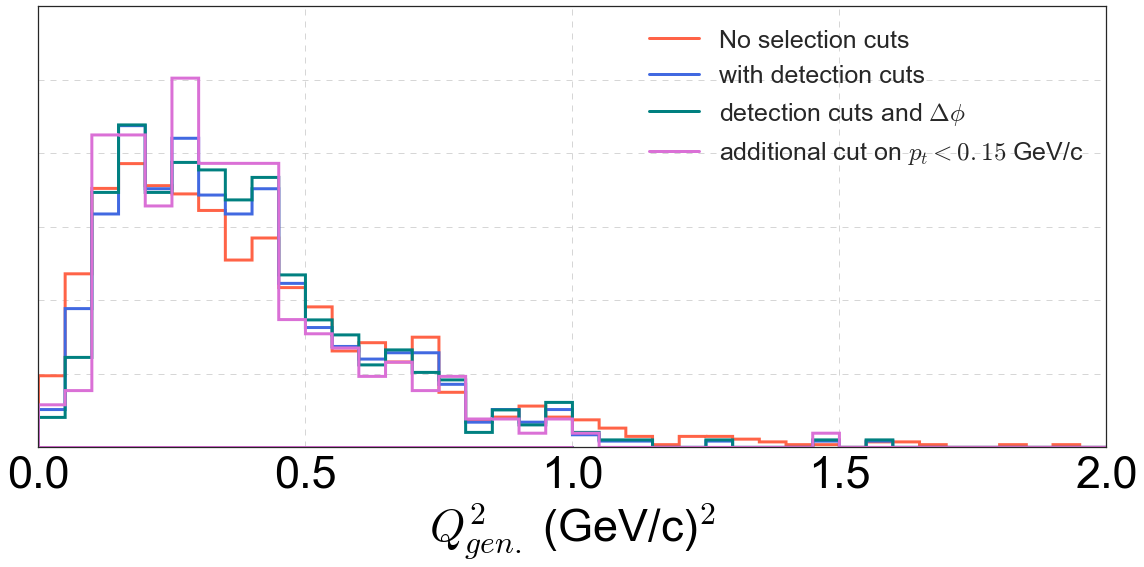

In [27]:
# Q2 before and after the cuts
bins = np.linspace(0.,2,41)
cuts   = ['no cut','vertex $\Delta Q$', '$|\Delta \phi - \pi|<\pi/6$' , '$p_{t}<0.15$' ]                                
labels = ['No selection cuts','with detection cuts','detection cuts and $\\Delta \\phi$', 'additional cut on $p_{t}<0.15$ GeV/c']
colors = ['tomato','royalblue','teal','Orchid']

fig_truth=plt.figure(figsize=(16,8))
ax_truth = fig_truth.add_subplot(111)

for cut_name,label,color in zip(cuts,labels,colors):
    
    sample = reduced_samples[cut_name]['1mu-1p']
    truth_Q2 = sample['truth_Q2']
    h,bins,_=plt.hist( truth_Q2 , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)

set_axes(ax_truth,'$Q^{2}_{gen.}$ (GeV/c)$^2$',ticks_color='black',fontsize=45,do_add_grid=True)
ax_truth.legend(loc='upper right',fontsize=25)
ax_truth.yaxis.set_major_formatter(ticker.NullFormatter())

plt.tight_layout()
fig_truth.savefig(figures_path+'Q2_truth_before_after_cuts.pdf')

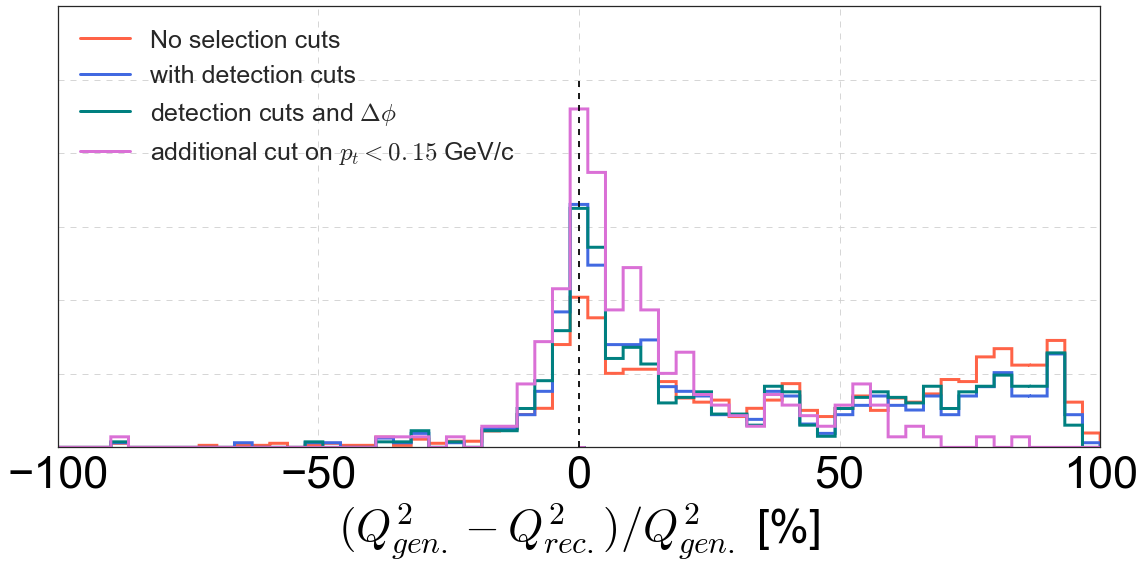

In [29]:
# reconstructed Q2 before and after the cuts
bins = np.linspace(-100,100,60)

fig_reco=plt.figure(figsize=(16,8))
ax_reco = fig_reco.add_subplot(111)

for cut_name,label,color in zip(cuts,labels,colors):
    
    sample = reduced_samples[cut_name]['1mu-1p']
    truth_Q2 = sample['truth_Q2']
    reco_Q2 = sample['reco_CC1p_Q2_fromE']
    dQ2 = truth_Q2 - reco_Q2
    ratio = 100*dQ2/truth_Q2
    h,bins,_=plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)

ax_reco.plot([0,0],ax_reco.get_ylim(),'--',color='black')
set_axes(ax_reco,'$(Q^{2}_{gen.} - Q^{2}_{rec.})/Q^{2}_{gen.}$ [%]',ticks_color='black',fontsize=45,do_add_grid=True)
ax_reco.legend(loc='upper left',fontsize=25)
ax_reco.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig_reco.savefig(figures_path+'Q2_reco_before_after_cuts.pdf')

39.7 % with ratio< 8 %
18.6 % with ratio< 8 %
13.0 % with ratio< 8 %


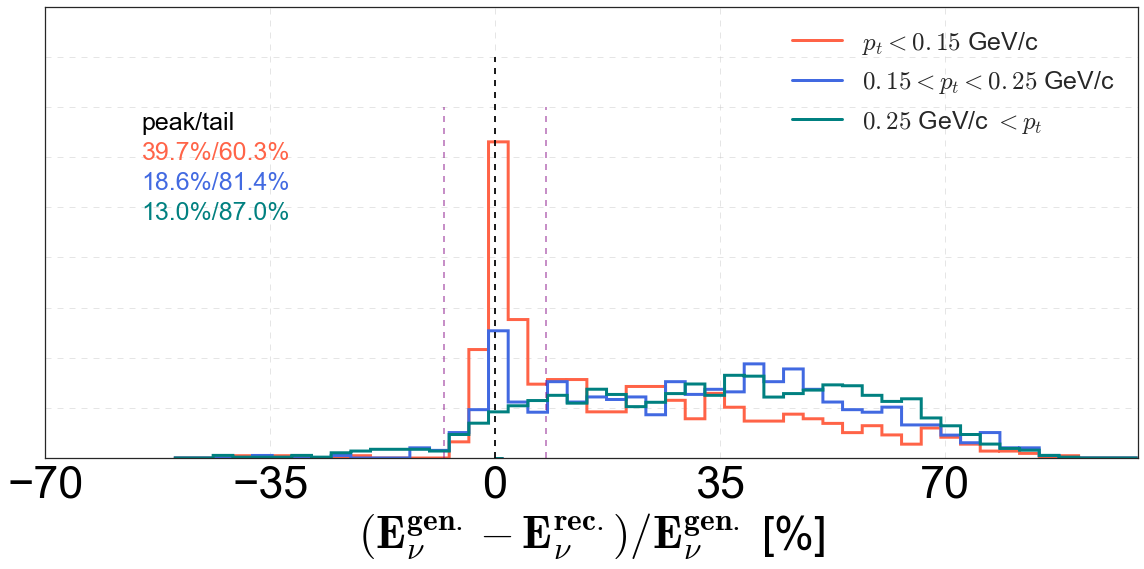

In [45]:
# In Pt bins after cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
mu_p =  reduced_samples['no cut']['1mu-1p']

cuts_s = [mu_p[mu_p['reco_CC1p_Pt']<0.15],mu_p[(mu_p['reco_CC1p_Pt']>0.15)&(mu_p['reco_CC1p_Pt']<0.25)],mu_p[mu_p['reco_CC1p_Pt']>0.25]]                                
labels = ['$p_{t}<0.15$ GeV/c','$0.15<p_{t}<0.25$ GeV/c','$0.25$ GeV/c $<p_{t}$']
colors = ['tomato','royalblue','teal']


fgood_arr = []
for sample,label,color in zip(cuts_s,labels,colors):
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_CC1p_Ev_fromE'])/sample['closest_genie_Ev']
    plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

plt.text( -55 , 0.85*np.max(ax.get_ylim())*(1.1) , 'peak/tail' , fontsize=25 , color='black' )
for i,fgood,color in zip(range(len(fgood_arr)),fgood_arr,colors):    
    plt.text( -55 , 0.85*np.max(ax.get_ylim())*(1-0.1*i) , '%.1f'%fgood+'%'+'/%.1f'%(100-fgood)+'%' , fontsize=25 , color=color )

ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
ax.legend(loc='upper right',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45,nticklabels=4)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig(figures_path+'EvReconstructedBinsPt.pdf')

56.1 % with ratio< 8 %
33.3 % with ratio< 8 %
12.2 % with ratio< 8 %


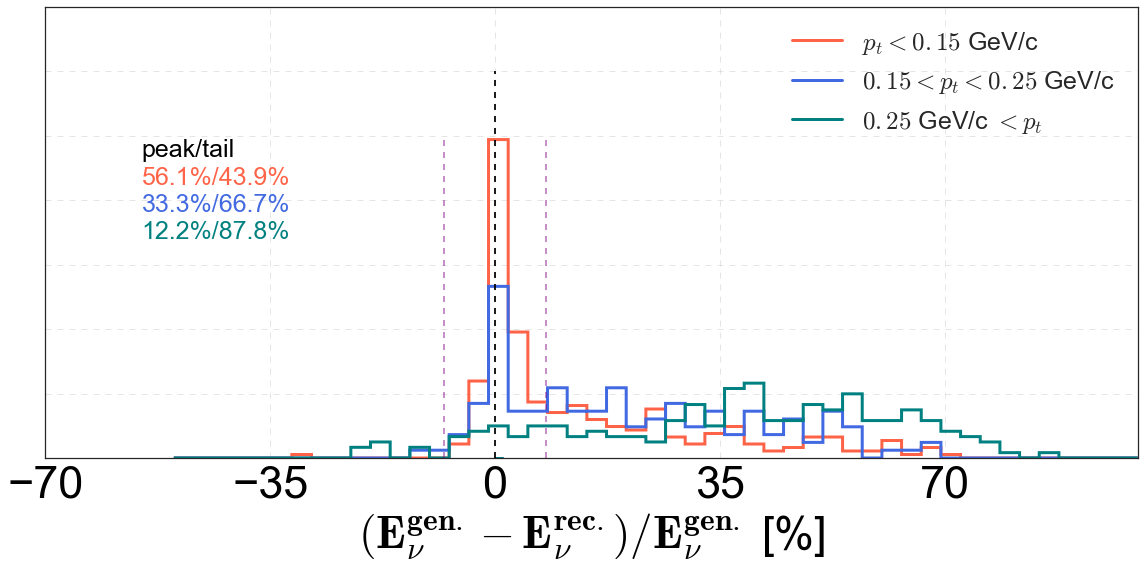

In [46]:
# In Pt bins after cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
mu_p =  reduced_samples['$|\Delta \phi - \pi|<\pi/6$']['1mu-1p']

cuts_s = [mu_p[mu_p['reco_CC1p_Pt']<0.15],mu_p[(mu_p['reco_CC1p_Pt']>0.15)&(mu_p['reco_CC1p_Pt']<0.25)],mu_p[mu_p['reco_CC1p_Pt']>0.25]]                                
labels = ['$p_{t}<0.15$ GeV/c','$0.15<p_{t}<0.25$ GeV/c','$0.25$ GeV/c $<p_{t}$']
colors = ['tomato','royalblue','teal']


fgood_arr = []
for sample,label,color in zip(cuts_s,labels,colors):
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_CC1p_Ev_fromE'])/sample['closest_genie_Ev']
    plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

plt.text( -55 , 0.85*np.max(ax.get_ylim())*(1.1) , 'peak/tail' , fontsize=25 , color='black' )
for i,fgood,color in zip(range(len(fgood_arr)),fgood_arr,colors):    
    plt.text( -55 , 0.85*np.max(ax.get_ylim())*(1-0.1*i) , '%.1f'%fgood+'%'+'/%.1f'%(100-fgood)+'%' , fontsize=25 , color=color )

ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
ax.legend(loc='upper right',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45,nticklabels=4)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig(figures_path+'EvReconstructedBinsPt_after_cut_5.pdf')

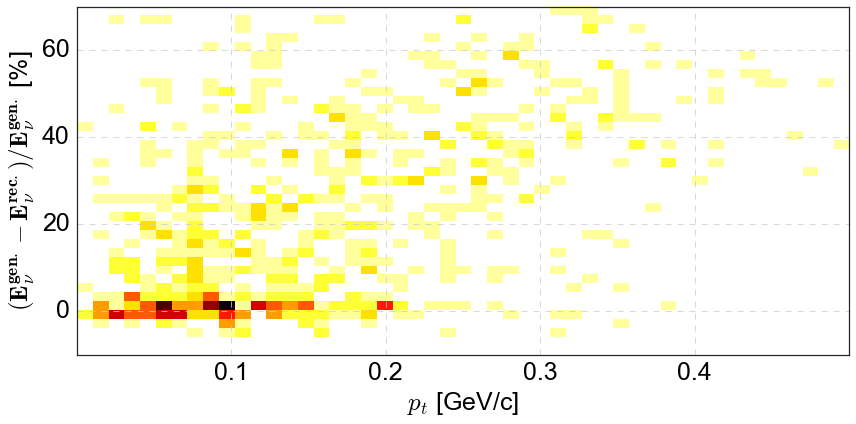

In [10]:
# 2d Ev vs. Pt
fig = plt.figure(figsize=(12,6))
bins=(np.linspace(0,.5,50),np.linspace(-10,70,40))
x_label,y_label='$p_{t}$ [GeV/c]','$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]'
mu_p_after_cuts =  pd.concat([reduced_samples['cut 5'][0],reduced_samples['cut 5'][1]])
ax = fig.add_subplot(1,1,1)
ratio = 100*(mu_p_after_cuts['truth_Ev'] - mu_p_after_cuts['reco_CC1p_Ev_fromE'])/mu_p_after_cuts['truth_Ev']
plot_2d_hist(mu_p_after_cuts['reco_CC1p_Pt'], ratio, ax=ax,fontsize=figures_fontsize,ticks_color='black',bins=bins,norm='')
set_axes(ax,x_label=x_label,y_label=y_label)
ax.xaxis.set_ticks([0.1,0.2,0.3,0.4])
ax.yaxis.set_ticks([0,20,40,60])
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'EvReconstructedVsPt.pdf')

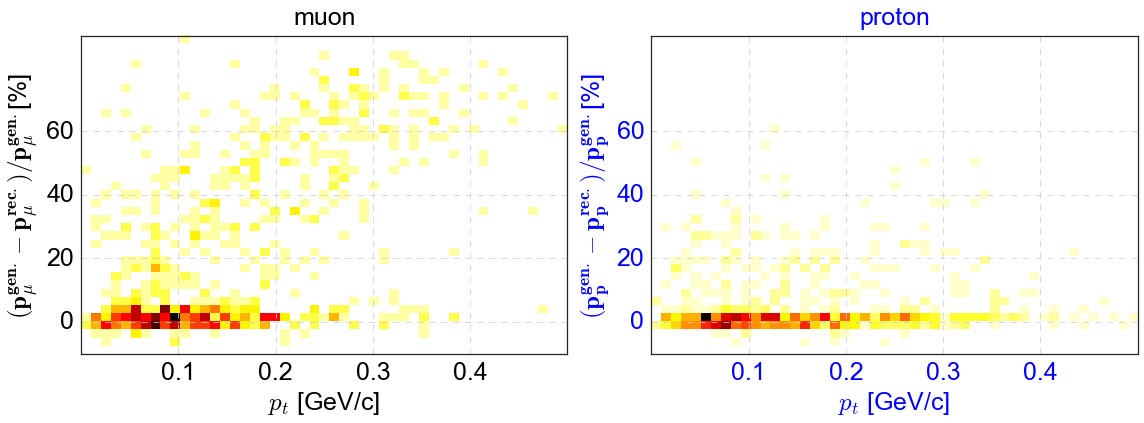

In [11]:
mu_p_after_cuts =  pd.concat([reduced_samples['cut 5'][0],reduced_samples['cut 5'][1]])

# 2d reconstructed momentum vs. Pt
fig = plt.figure(figsize=(16,6))
bins=(np.linspace(0,.5,50),np.linspace(-10,90,40))
x_label = '$p_{t}$ [GeV/c]'

for i,name,par,pname,color in zip(range(2),['muon','proton'],['mu','p'],['\\mu','p'],['black','blue']):
    
    ax = fig.add_subplot(1,2,i+1)
    y_label = '$\\bf{(p^{gen.}_{%s}-p^{rec.}_{%s})/p^{gen.}_{%s}}$'%(pname,pname,pname)+'[%]'
    ax.set_title(name,y=1.02,fontsize=25,color=color)
    ratio = 100*(mu_p_after_cuts['truth_P%s'%par] - mu_p_after_cuts['reco_CC1p_P%s'%par])/mu_p_after_cuts['truth_P%s'%par]
    plot_2d_hist(mu_p_after_cuts['reco_CC1p_Pt'], ratio, ax=ax,fontsize=figures_fontsize,bins=bins,norm='')
    set_axes(ax,x_label=x_label,y_label=y_label,ticks_color=color)
    ax.xaxis.set_ticks([0.1,0.2,0.3,0.4])
    ax.yaxis.set_ticks([0,20,40,60])
    ax.grid(linestyle='--',alpha=0.75)
    
plt.tight_layout()
fig.savefig(figures_path+'ReconstructedMomentumVsPt.pdf')